Atividade 2 do Professor Júlio. Aqui corrigimos a posição (ra,dec) das fontes selecionadas para obter a posição de Plutão. Utilizaremos o método dos mínimos quadrados para obter a posição de Plutão a partir da posição das estrelas que selecionamos. 

Part 2 of the activity.

We're supposed to compute the equatorial coordinates of Pluto using the coordinates of Pluto in the CCD image and the positions in RA and DEC of the stars selected in the previous question resolved.

We can build a system of equations to find constants a,b,c,d,e and f to find $\alpha$ and $\delta$, given by:

\begin{equation}
    aX + bY + c = \alpha \; ,
\end{equation}

for right ascension. This can be written in the form of a matrix Ax = B, or:

\begin{equation}
\begin{bmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1 \\
x_4 & y_4 & 1 \\
x_5 & y_5 & 1 \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix} = \begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\alpha_5 \\
\end{bmatrix} \; .
\end{equation}

The same can be done for declination with:

\begin{equation}
    dX + eY + f = \delta \; ,
\end{equation}

and: 

\begin{equation}
\begin{bmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1 \\
x_4 & y_4 & 1 \\
x_5 & y_5 & 1 \\
\end{bmatrix}
\begin{bmatrix}
d \\
e \\
f \\
\end{bmatrix} = \begin{bmatrix}
\delta_1 \\
\delta_2 \\
\delta_3 \\
\delta_4 \\
\delta_5
\end{bmatrix} \; .
\end{equation}

We'll use the least square method to obtain the coefficients.

In [12]:
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
import astropy.units as u
import astropy.coordinates as coord
import math
import statistics
import numpy as np
from sklearn.linear_model import LinearRegression
%run -i /home/usuario/Documents/2semestre/AstronomiaObservacional/ProfJulio/observational-astronomy/obs_tools.py

In [13]:
p  = ['18 21 04.3786 -18 08 07.324', '18 21 18.6722 -18 12 08.166',
      '18 21 17.8106 -18 10 29.221','18 21 24.6363 -18 12 15.806',
      '18 21 26.6551 -18 10 39.279']

year_sci = 2010           # header sci (start of frame exposure) 
month_sci = 4             # header sci (start of frame exposure) 

ra, de = astrometric_correction(5, p, year_sci, month_sci)

In [14]:
#coordinates (x,y) of the sources on the ccd
data_ccd = [[1558.66, 1799.84, 1],[841.815, 1183.25, 1], [1138.26, 1223.27, 1],[819.582, 928.313, 1], [1104.17, 845.31, 1]]

In [15]:
# X e Y são as variáveis independentes
X = np.array([[1558.66, 1799.84],[841.815, 1183.25], [1138.26, 1223.27],[819.582, 928.313], [1104.17, 845.31]])
# alpha é a variável dependente
alpha = np.array(ra)
delta = np.array(de)

# Criando o modelo de regressão linear
model = LinearRegression()

# Ajustando o modelo aos dados
model.fit(X, alpha)

# Coeficientes a e b
a1, b1 = model.coef_

# Intercepto c
c1 = model.intercept_

In [16]:
def func(x, y, a, b, c): 
    x_grid, y_grid = np.meshgrid(x, y)
    
    return a*x_grid + b*y_grid + c

In [17]:
## ccd coordinates
xx = np.array([1558.66, 841.815, 1138.26, 819.582, 1104.17])
yy = np.array([1799.84, 1183.25, 1223.27, 928.313, 845.31])

In [18]:
ra_leastsquares = func(xx, yy, a1, b1, c1)

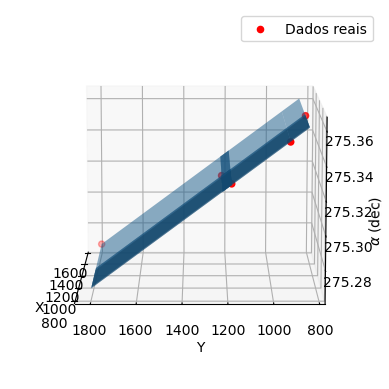

In [83]:
import matplotlib.pyplot as plt

x_grid, y_grid = np.meshgrid(xx, yy)

# Criando o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], alpha, color='red', label='Dados reais')
# Plotando o plano ajustado
ax.plot_surface(x_grid, y_grid, ra_leastsquares , alpha=0.5)
ax.view_init(10, 180)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\alpha$ (dec)')
#ax.set_title('Regressão Linear: Ajuste do Plano')
plt.legend()

In [20]:
print(a1, b1, c1)

5.284830565870699e-07 -9.762849045091403e-05 275.44294535106917


In [21]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Ajustando o modelo aos dados
model.fit(X, de)

# Coeficientes a e b
a2, b2 = model.coef_

# Intercepto c
c2 = model.intercept_

In [22]:
print(a2, b2, c2)

9.298697484706982e-05 2.864499910077418e-07 -18.280860262373604


In [23]:
de_leastsquares = func(xx, yy, a2, b2, c2)

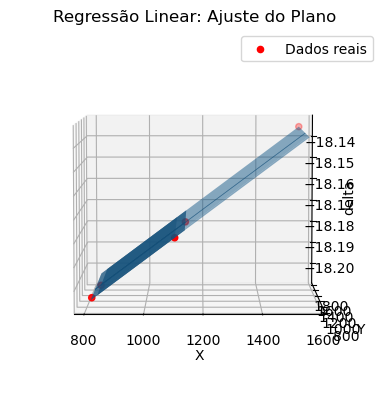

In [84]:
import matplotlib.pyplot as plt

x_grid, y_grid = np.meshgrid(xx, yy)

# Criando o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], delta, color='red', label='Dados reais')
# Plotando o plano ajustado
ax.plot_surface(x_grid, y_grid, de_leastsquares , alpha=0.5)
ax.view_init(5,-90)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('delta')
ax.set_title('Regressão Linear: Ajuste do Plano')
plt.legend()

Na Atividade 1 encontramos as coordenadas de Plutão na imagem CCD. $x_{pluto} = 954.706$, $y_{pluto} = 1183.44$.

In [25]:
x_pluto = 954.706
y_pluto = 1183.44

In [32]:
ra_pluto = func(x_pluto, y_pluto, a1, b1, c1)
de_pluto = func(x_pluto, y_pluto, a2, b2, c2)

print(f'Ascenção Reta de Plutão: {ra_pluto[0,0]:.8f} graus.')
print(f'Declinação de Plutão: {de_pluto[0,0]:.8f} graus.')

Ascenção Reta de Plutão: 275.32791244 graus.
Declinação de Plutão: -18.19174604 graus.


In [38]:
ra_pluto_hms = Angle(ra_pluto, unit=u.deg).to_string(unit=u.hour, sep=':', precision=8)
de_pluto_dms = Angle(de_pluto, unit=u.deg).to_string(unit=u.deg, sep=':', precision=8, alwayssign=True)
print(f"Ascensão Reta de Plutão em h:m:s: {ra_pluto_hms[0,0]}")
print(f"Declinação de Plutão em d:m:s: {de_pluto_dms[0,0]}")

Ascensão Reta de Plutão em h:m:s: 18:21:18.69898471
Declinação de Plutão em d:m:s: -18:11:30.28575548


As coordenadas no JPL de Plutão para a data que consta no header da imagem CCD são:

In [39]:
ra_pluto_jpl = '18:21:18.70'
de_pluto_jpl = '-18:11:30.2'
print(f"Ascensão Reta de Plutão em h:m:s obtida no JPL: {ra_pluto_jpl}")
print(f"Declinação de Plutão em d:m:s obtida no JPL: {de_pluto_jpl}")

Ascensão Reta de Plutão em h:m:s obtida no JPL: 18:21:18.70
Declinação de Plutão em d:m:s obtida no JPL: -18:11:30.2


Vemos que há boa concordância entre nossos cálculos e os dados do JPL.

Precisamos determinar a incerteza das medidas.